# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from api_keys import api_key
city_weather = "imperial"

from citipy import citipy

output_data_file = 'weather.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={city_weather}&q="
#print (query_url)

# define count of pass throughs
count_one = 0
set_one = 1


## Generate Cities List

In [2]:
# List for lat_long and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set count
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 25:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Printing City Records {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Null value. Skip...")


Printing City Records 1 of Set 1 | mamallapuram
Null value. Skip...
Printing City Records 2 of Set 1 | urengoy
Printing City Records 3 of Set 1 | kodiak
Printing City Records 4 of Set 1 | airai
Printing City Records 5 of Set 1 | mehamn
Printing City Records 6 of Set 1 | inverbervie
Printing City Records 7 of Set 1 | punta arenas
Printing City Records 8 of Set 1 | komsomolskiy
Printing City Records 9 of Set 1 | nouadhibou
Printing City Records 10 of Set 1 | cidreira
Printing City Records 11 of Set 1 | port elizabeth
Printing City Records 12 of Set 1 | barrow
Printing City Records 13 of Set 1 | lebu
Printing City Records 14 of Set 1 | san mateo
Printing City Records 15 of Set 1 | esperance
Printing City Records 16 of Set 1 | mataura
Printing City Records 17 of Set 1 | cockburn town
Printing City Records 18 of Set 1 | khatanga
Printing City Records 19 of Set 1 | east london
Printing City Records 20 of Set 1 | rikitea
Printing City Records 21 of Set 1 | san antero
Printing City Records 22 

Printing City Records 19 of Set 7 | nanortalik
Printing City Records 20 of Set 7 | alofi
Null value. Skip...
Printing City Records 21 of Set 7 | saskylakh
Null value. Skip...
Printing City Records 22 of Set 7 | tecolutla
Null value. Skip...
Null value. Skip...
Null value. Skip...
Printing City Records 23 of Set 7 | marsaxlokk
Null value. Skip...
Null value. Skip...
Printing City Records 24 of Set 7 | deputatskiy
Printing City Records 25 of Set 7 | luzhou
Printing City Records 26 of Set 7 | tanout
Printing City Records 1 of Set 8 | cayenne
Printing City Records 2 of Set 8 | hay river
Null value. Skip...
Printing City Records 3 of Set 8 | kommunisticheskiy
Printing City Records 4 of Set 8 | taloqan
Printing City Records 5 of Set 8 | waddan
Printing City Records 6 of Set 8 | port alfred
Printing City Records 7 of Set 8 | whyalla
Printing City Records 8 of Set 8 | gull lake
Printing City Records 9 of Set 8 | saint-philippe
Printing City Records 10 of Set 8 | serenje
Null value. Skip...
Nul

Printing City Records 3 of Set 14 | inongo
Printing City Records 4 of Set 14 | bardsir
Printing City Records 5 of Set 14 | farso
Null value. Skip...
Printing City Records 6 of Set 14 | lufilufi
Null value. Skip...
Printing City Records 7 of Set 14 | ola
Printing City Records 8 of Set 14 | chuy
Printing City Records 9 of Set 14 | port moresby
Printing City Records 10 of Set 14 | voskresenskoye
Printing City Records 11 of Set 14 | kaoma
Printing City Records 12 of Set 14 | port hedland
Printing City Records 13 of Set 14 | vila velha
Printing City Records 14 of Set 14 | marsh harbour
Printing City Records 15 of Set 14 | itaqui
Printing City Records 16 of Set 14 | labuhan
Printing City Records 17 of Set 14 | san carlos de bariloche
Printing City Records 18 of Set 14 | roma
Printing City Records 19 of Set 14 | strezhevoy
Printing City Records 20 of Set 14 | moussoro
Printing City Records 21 of Set 14 | aswan
Printing City Records 22 of Set 14 | fort nelson
Printing City Records 23 of Set 14

Printing City Records 15 of Set 20 | menomonie
Null value. Skip...
Printing City Records 16 of Set 20 | tessalit
Printing City Records 17 of Set 20 | mapiri
Printing City Records 18 of Set 20 | cortez
Printing City Records 19 of Set 20 | nelson bay
Printing City Records 20 of Set 20 | hamilton
Printing City Records 21 of Set 20 | gizo
Printing City Records 22 of Set 20 | muravlenko
Printing City Records 23 of Set 20 | chase
Printing City Records 24 of Set 20 | poputnaya
Null value. Skip...
Printing City Records 25 of Set 20 | methven
Printing City Records 26 of Set 20 | diamantino
Printing City Records 1 of Set 21 | novosmolinskiy
Null value. Skip...
Printing City Records 2 of Set 21 | cefalu
Printing City Records 3 of Set 21 | solano
Printing City Records 4 of Set 21 | lisakovsk
Printing City Records 5 of Set 21 | porto velho
Printing City Records 6 of Set 21 | grand gaube
Printing City Records 7 of Set 21 | acapulco
Null value. Skip...
Null value. Skip...
Printing City Records 8 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary
weather_dict = {
    "City":city_two,
    "Cloudy":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Hum":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Temp":max_temps,
    "Wind":wind_speeds
}


In [5]:
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
weather_dataframe.head()

,City,Cloudy,Country,Date,Hum,Lat,Lng,Temp,Wind
0,mamallapuram,75,IN,1573300488,83,12.63,80.17,86.00,8.05
1,urengoy,75,RU,1573300488,97,65.96,78.37,-7.25,11.01
2,kodiak,1,US,1573300488,69,39.95,-94.76,35.01,12.75
3,airai,27,TL,1573300488,90,-8.93,125.41,68.32,2.01
4,mehamn,0,NO,1573300488,77,71.03,27.85,16.92,6.71


In [7]:
weather_dataframe.to_csv(output_data_file)

In [8]:
weather_dataframe.count()

City       539
Cloudy     539
Country    539
Date       539
Hum        539
Lat        539
Lng        539
Temp       539
Wind       539
dtype: int64

In [9]:
weather_dataframe.head()

,City,Cloudy,Country,Date,Hum,Lat,Lng,Temp,Wind
0,mamallapuram,75,IN,1573300488,83,12.63,80.17,86.00,8.05
1,urengoy,75,RU,1573300488,97,65.96,78.37,-7.25,11.01
2,kodiak,1,US,1573300488,69,39.95,-94.76,35.01,12.75
3,airai,27,TL,1573300488,90,-8.93,125.41,68.32,2.01
4,mehamn,0,NO,1573300488,77,71.03,27.85,16.92,6.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

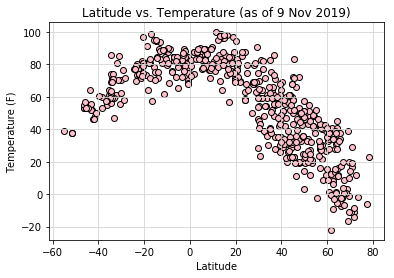

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Temp"],edgecolors="black",facecolors="pink")
plt.title("Latitude vs. Temperature (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

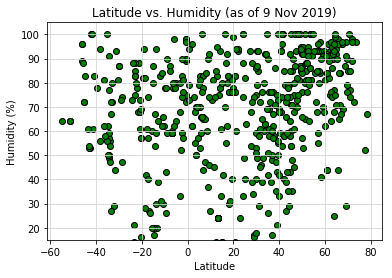

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Hum"],edgecolors="black",facecolors="green")
plt.title("Latitude vs. Humidity (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

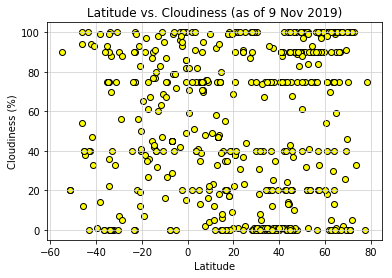

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudy"],edgecolors="black",facecolors="yellow")
plt.title("Latitude vs. Cloudiness (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsCloudy.png")
plt.show()

#### Latitude vs. Wind Speed Plot

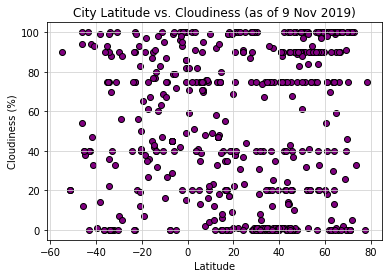

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudy"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsWind.png")
plt.show()